In [1]:
## Import modules
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from datetime import date

In [2]:
# pretty print JSON
import json
import requests as req
def pretty_print_json(obj):
    print(json.dumps(obj, indent=4, sort_keys=True))

In [3]:
# Randomly select cities, create a city list
city_random_list = []

lats = range(-90, 90)
lngs = range(-180, 180)

# call Citipy to get the nearest city for given lat and long
for lat in lats:
    for lng in lngs:
        try:
            city = citipy.nearest_city(lat, lng)
            city_random_list.append(city)
        except:
            continue
            
# remove duplicates
unique_city_list = set(city_random_list)
unique_city_list = list(unique_city_list)

# Intialize City Dictionary
city = {"City":[],
           "Country": []}

# Populate City and Country values from Citipy Object
for x in unique_city_list:
    city["City"].append(x.city_name)
    city["Country"].append(x.country_code)
    
city_df = pd.DataFrame(city)
# Get a sample of 500 Cities from the City List
sampled_cities = city_df.sample(500)
sampled_cities.head()

,City,Country
5368,husavik,is
7582,corinto,ni
5074,xunchang,cn
5698,muslyumovo,ru
3922,bakchar,ru


In [5]:
# call weather API 

api_key = "49e2bced266776ffad4c1ec841c99bdc"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

weather_data = []

for city in sampled_cities["City"]:           
    #print("Record for City " + "|" + city)
    try:   
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
        # print(query_url)
        weather_data.append(req.get(query_url).json())
    except:
        continue

print(len(weather_data))

500


In [6]:
# Intialize Weather Dictionary
weather_dict = { "City": [],
                "Country": [],
               "Cloudiness": [],
               "Lat": [], 
                "Long": [],
               "Date": [], 
                "Humidity": [], 
                "Max Temp": [], 
                "Wind Speed": []}

# Get Weather Data from api calls 

for data in weather_data:
    try: 
        weather_dict["Country"].append(data.get("sys").get("country"))
        weather_dict["City"].append(data.get("name"))
        weather_dict["Cloudiness"].append(data.get("clouds").get("all"))
        weather_dict["Lat"].append(data.get("coord").get("lat"))
        weather_dict["Long"].append(data.get("coord").get("lon"))
        weather_dict["Max Temp"].append(data.get("main").get("temp_max"))
        weather_dict["Humidity"].append(data.get("main").get("humidity")) 
        weather_dict["Wind Speed"].append(data.get("wind").get("speed"))
        weather_dict["Date"].append(data.get("dt"))
    except:
        continue
 # make a DataFrame for Weather Data
weather_df = pd.DataFrame(weather_dict)
weather_df.count()
# change NaN to 0
weather_df = weather_df.fillna(0)
# import to CSV file
weather_df.to_csv("Weather_of_cities.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Husavik,44,CA,1516619383,91,50.56,-96.99,13.77,3.94
1,Corinto,0,BR,1516619657,69,-18.36,-44.46,80.32,6.17
2,Xunchang,92,CN,1516619383,90,28.45,104.71,50.35,2.71
3,Muslyumovo,92,RU,1516619384,82,55.31,53.19,17.82,13.67
4,Bakchar,0,RU,1516619384,50,57.02,82.07,-29.53,5.61


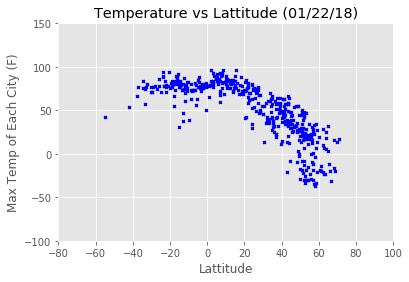

In [8]:
# plot a scatter plot for each data type
# Temperature vs Lattitude Plot

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], c='b', marker="x", s=8)
plt.style.use('ggplot')

today = date.today()
today = date.strftime(today,"%x")
plt.title("Temperature vs Lattitude (%s)" % (today))
plt.ylabel("Max Temp of Each City (F)")
plt.xlabel("Lattitude")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-100, 150)
plt.savefig("CityTemp.png")
plt.show()

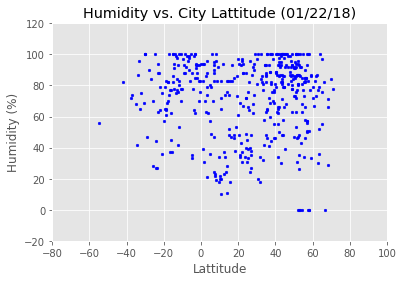

In [9]:

# Humidity vs Lattitude Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], c='b', marker="o", s=7)
plt.style.use('ggplot')
# Incorporate the other graph properties
plt.title("Humidity vs. City Lattitude (%s)" % (today))
plt.ylabel("Humidity (%)")
plt.xlabel("Lattitude")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-20, 120)

plt.savefig("HumidityofCity.png")
plt.show()

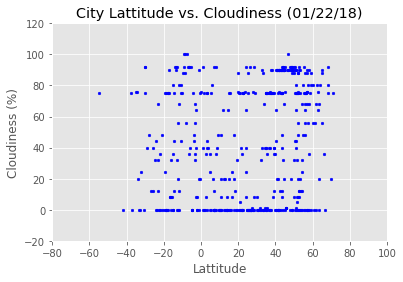

In [10]:

# Lattitude vs Cloudiness Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], c='b', marker="o", s=7)
plt.style.use('ggplot')

# Incorporate the other graph properties
plt.title("City Lattitude vs. Cloudiness (%s)" % (today))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-20, 120)
# Save the figure
plt.savefig("CityCloudiness.png")
plt.show()

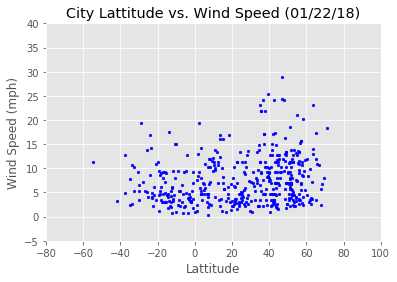

In [11]:
# Lattitude vs Wind Speed Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], c='b', marker="o",s=7)
#plt.style.use('ggplot')
# Incorporate the other graph properties
plt.title("City Lattitude vs. Wind Speed (%s)" % (today))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Lattitude")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-5, 40)
# Save the figure
plt.savefig("CityWind.png")

# Show plot
plt.show()